# Housing Prices - Advanced Regression Techniques

Filename: housing-model.ipynb \
Author: Timothy Holland \
Last updated: 27/05/2024 \
Kaggle competition: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

## 1. Data Loading & Analysis

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load training data
train_data = pd.read_csv('housing-prices-data/train.csv')
test_data = pd.read_csv('housing-prices-data/test.csv')

# Drop ID column from both
train_data = train_data.drop('Id', axis=1)
test_id = test_data['Id']
test_data = test_data.drop('Id', axis=1)

# Display first few rows
print(train_data.head())

# Summary of statistics
print(train_data.describe())

# Information in dataset
print(train_data.info())


   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     20850

In [36]:
# Display summary statistics for each feature
print(train_data.describe())

# Display the data types of each feature
print(train_data.info())

# Check for missing values in each feature
print(train_data.isnull().sum())

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ..

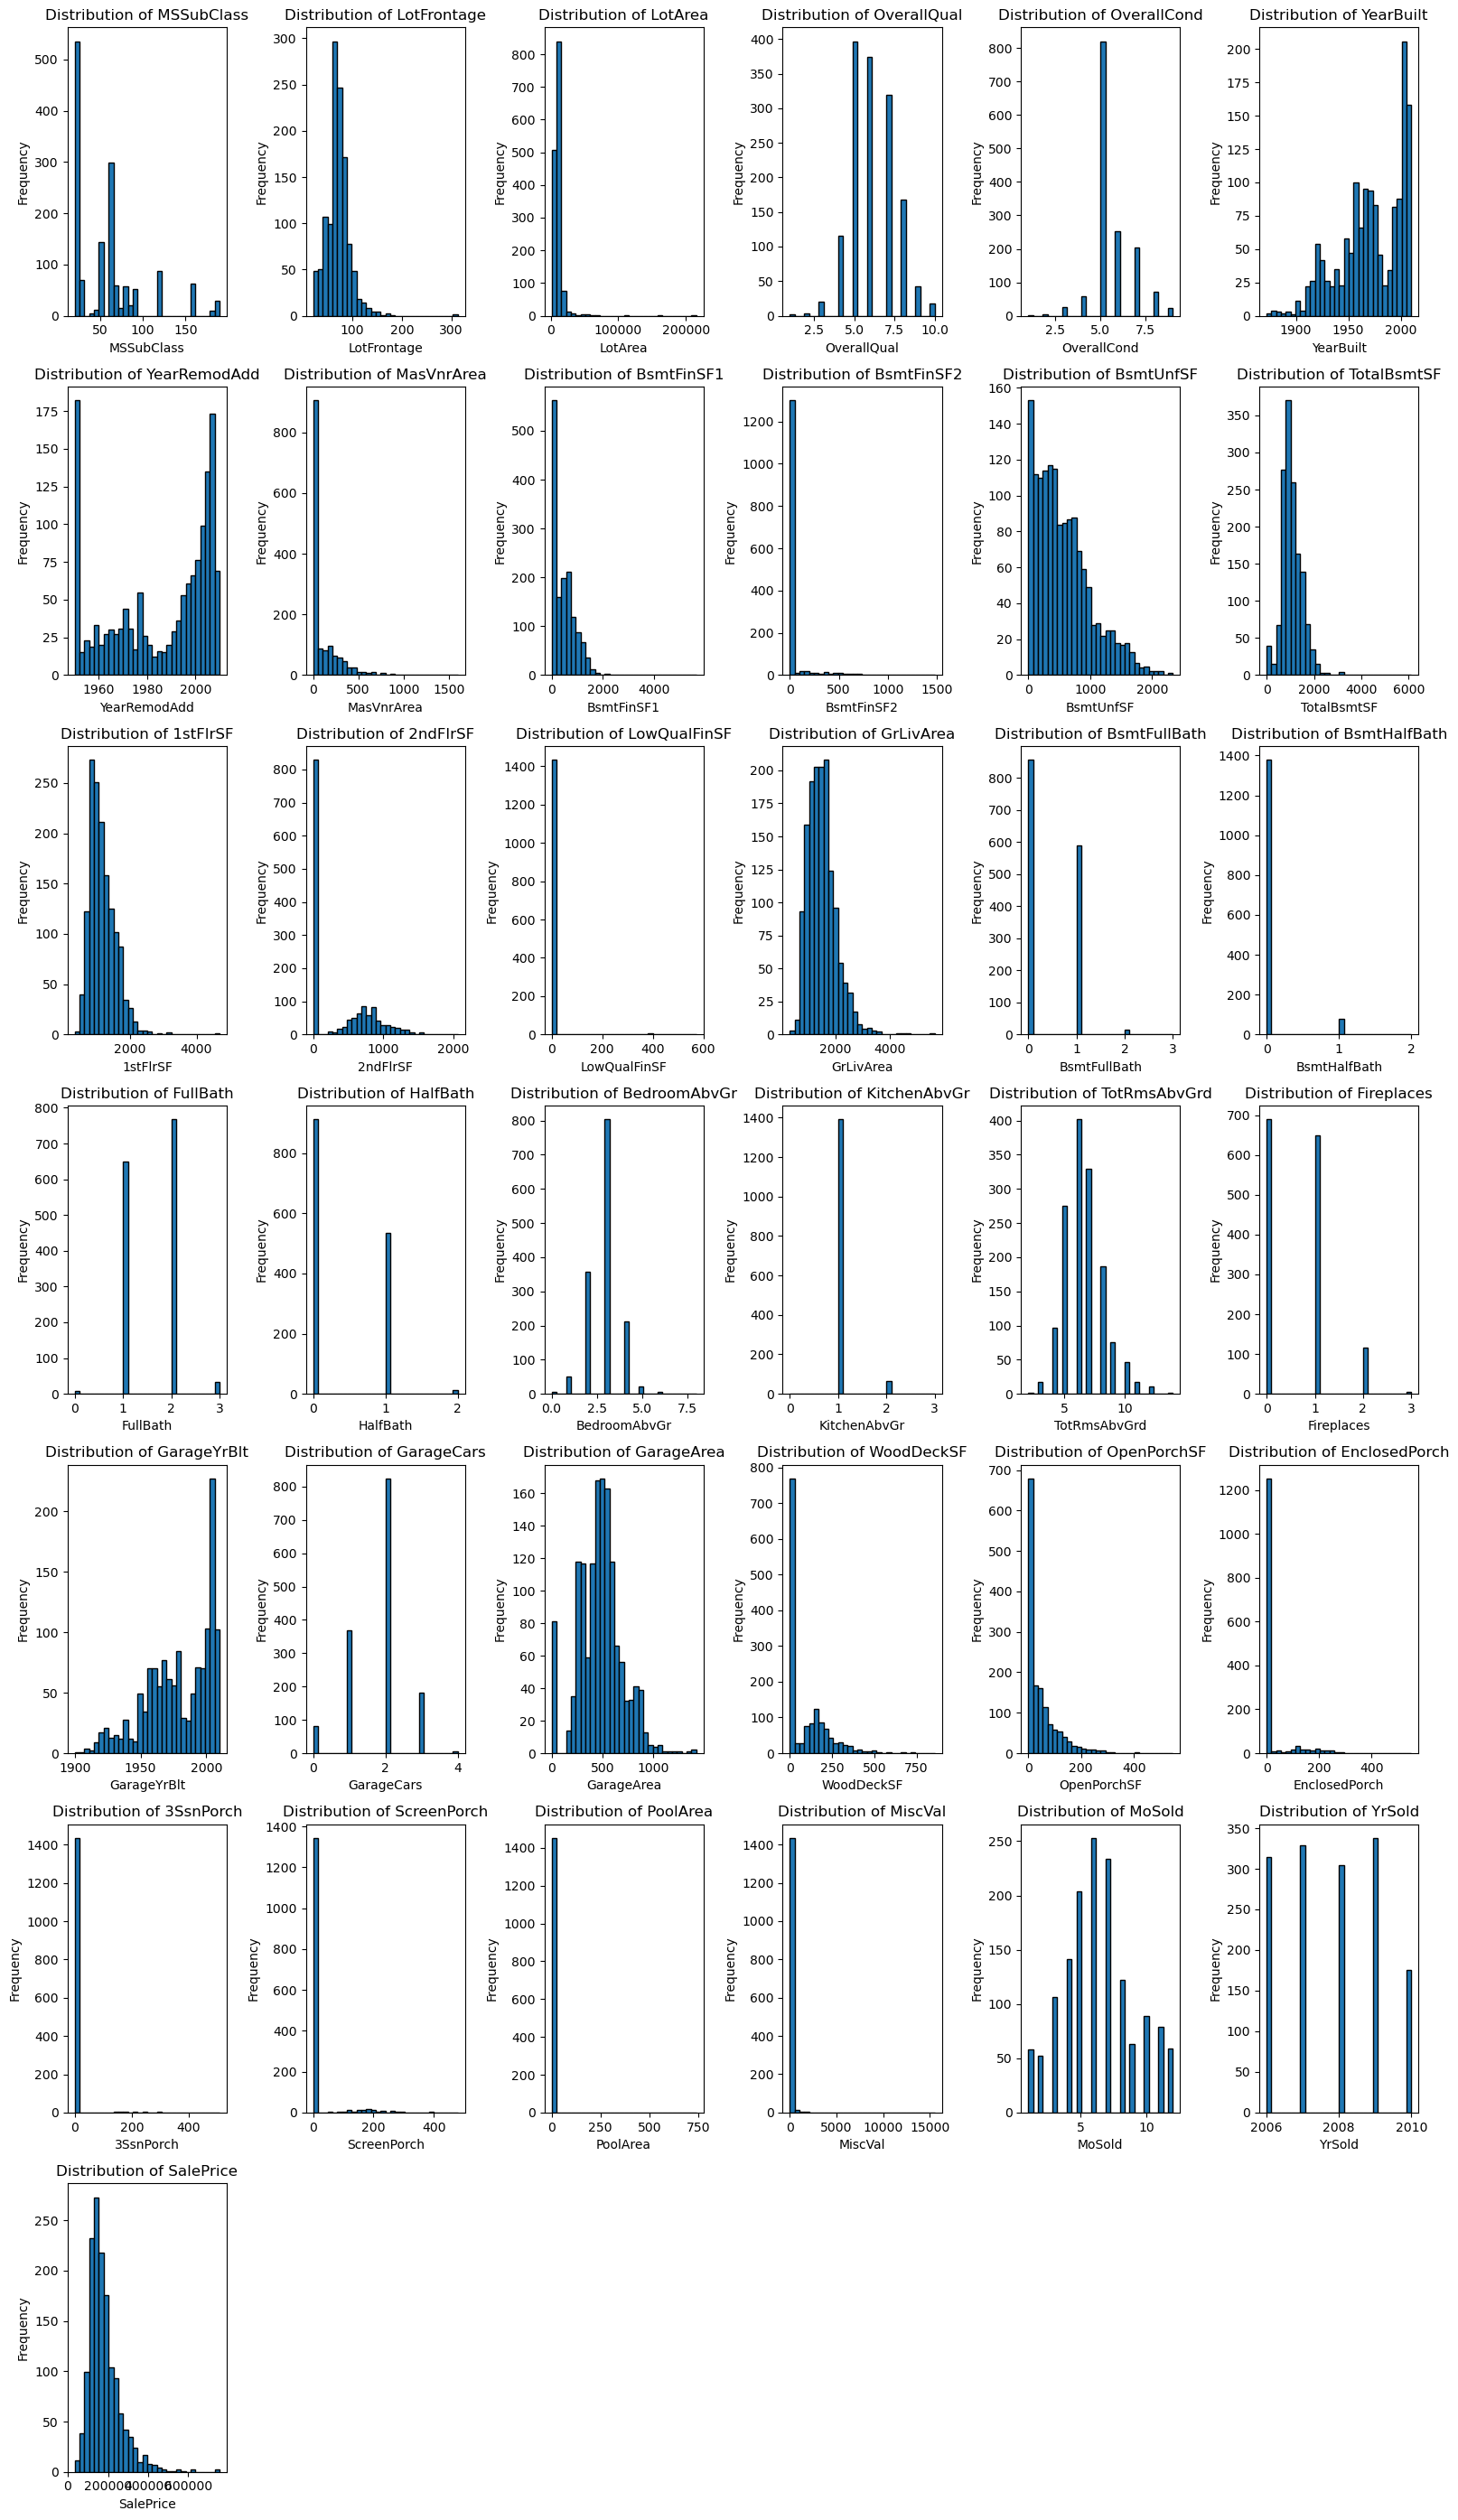

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify numeric features
numeric_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Create subplots for numeric features
num_features = len(numeric_features)
num_cols = 6
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(numeric_features):
    ax = axes[i]
    ax.hist(train_data[column], bins=30, edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove any unused subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

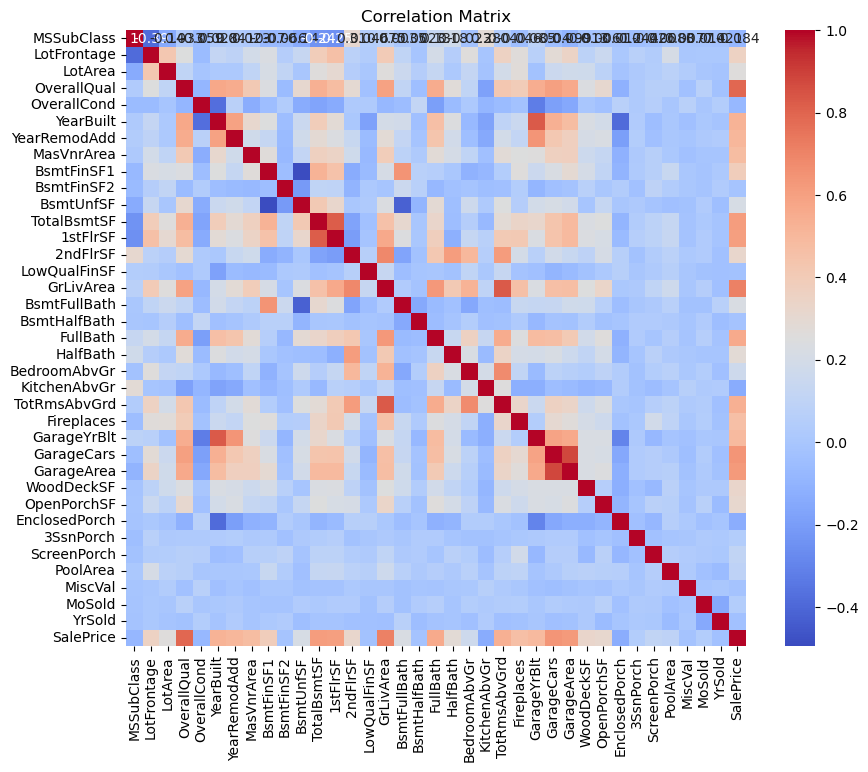

In [38]:
# Select only the numeric columns for correlation matrix
numeric_columns = train_data.select_dtypes(include=[float, int]).columns
numeric_data = train_data[numeric_columns]

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 2. Data Preprocessing

In [66]:
# Split data
y = train_data['SalePrice']
X = train_data.drop('SalePrice', axis=1)

Features with missing values:
LotFrontage: 17.74%
Alley: 93.77%
MasVnrType: 59.73%
MasVnrArea: 0.55%
BsmtQual: 2.53%
BsmtCond: 2.53%
BsmtExposure: 2.60%
BsmtFinType1: 2.53%
BsmtFinType2: 2.60%
Electrical: 0.07%
FireplaceQu: 47.26%
GarageType: 5.55%
GarageYrBlt: 5.55%
GarageFinish: 5.55%
GarageQual: 5.55%
GarageCond: 5.55%
PoolQC: 99.52%
Fence: 80.75%
MiscFeature: 96.30%


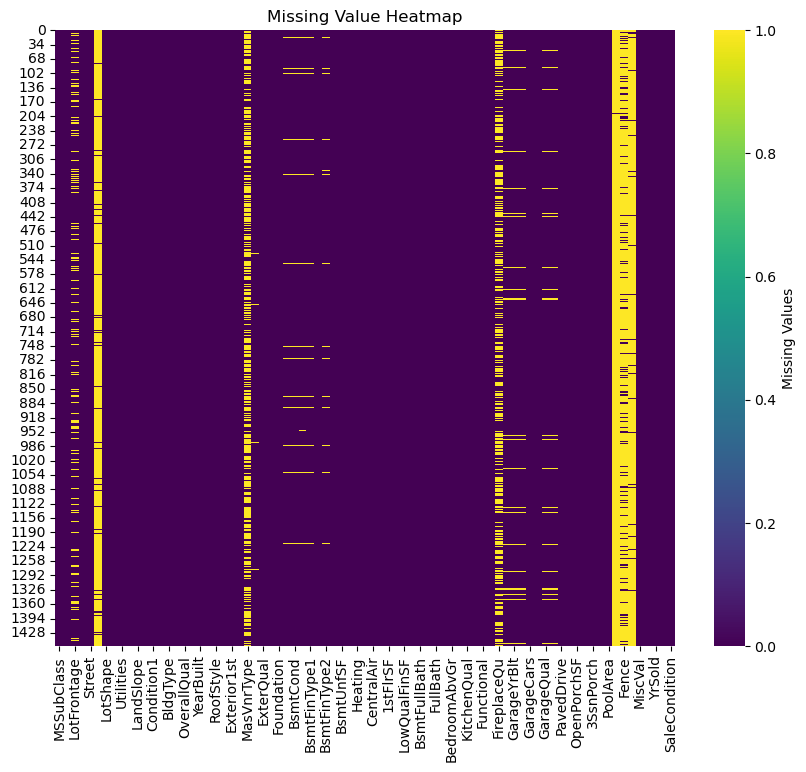

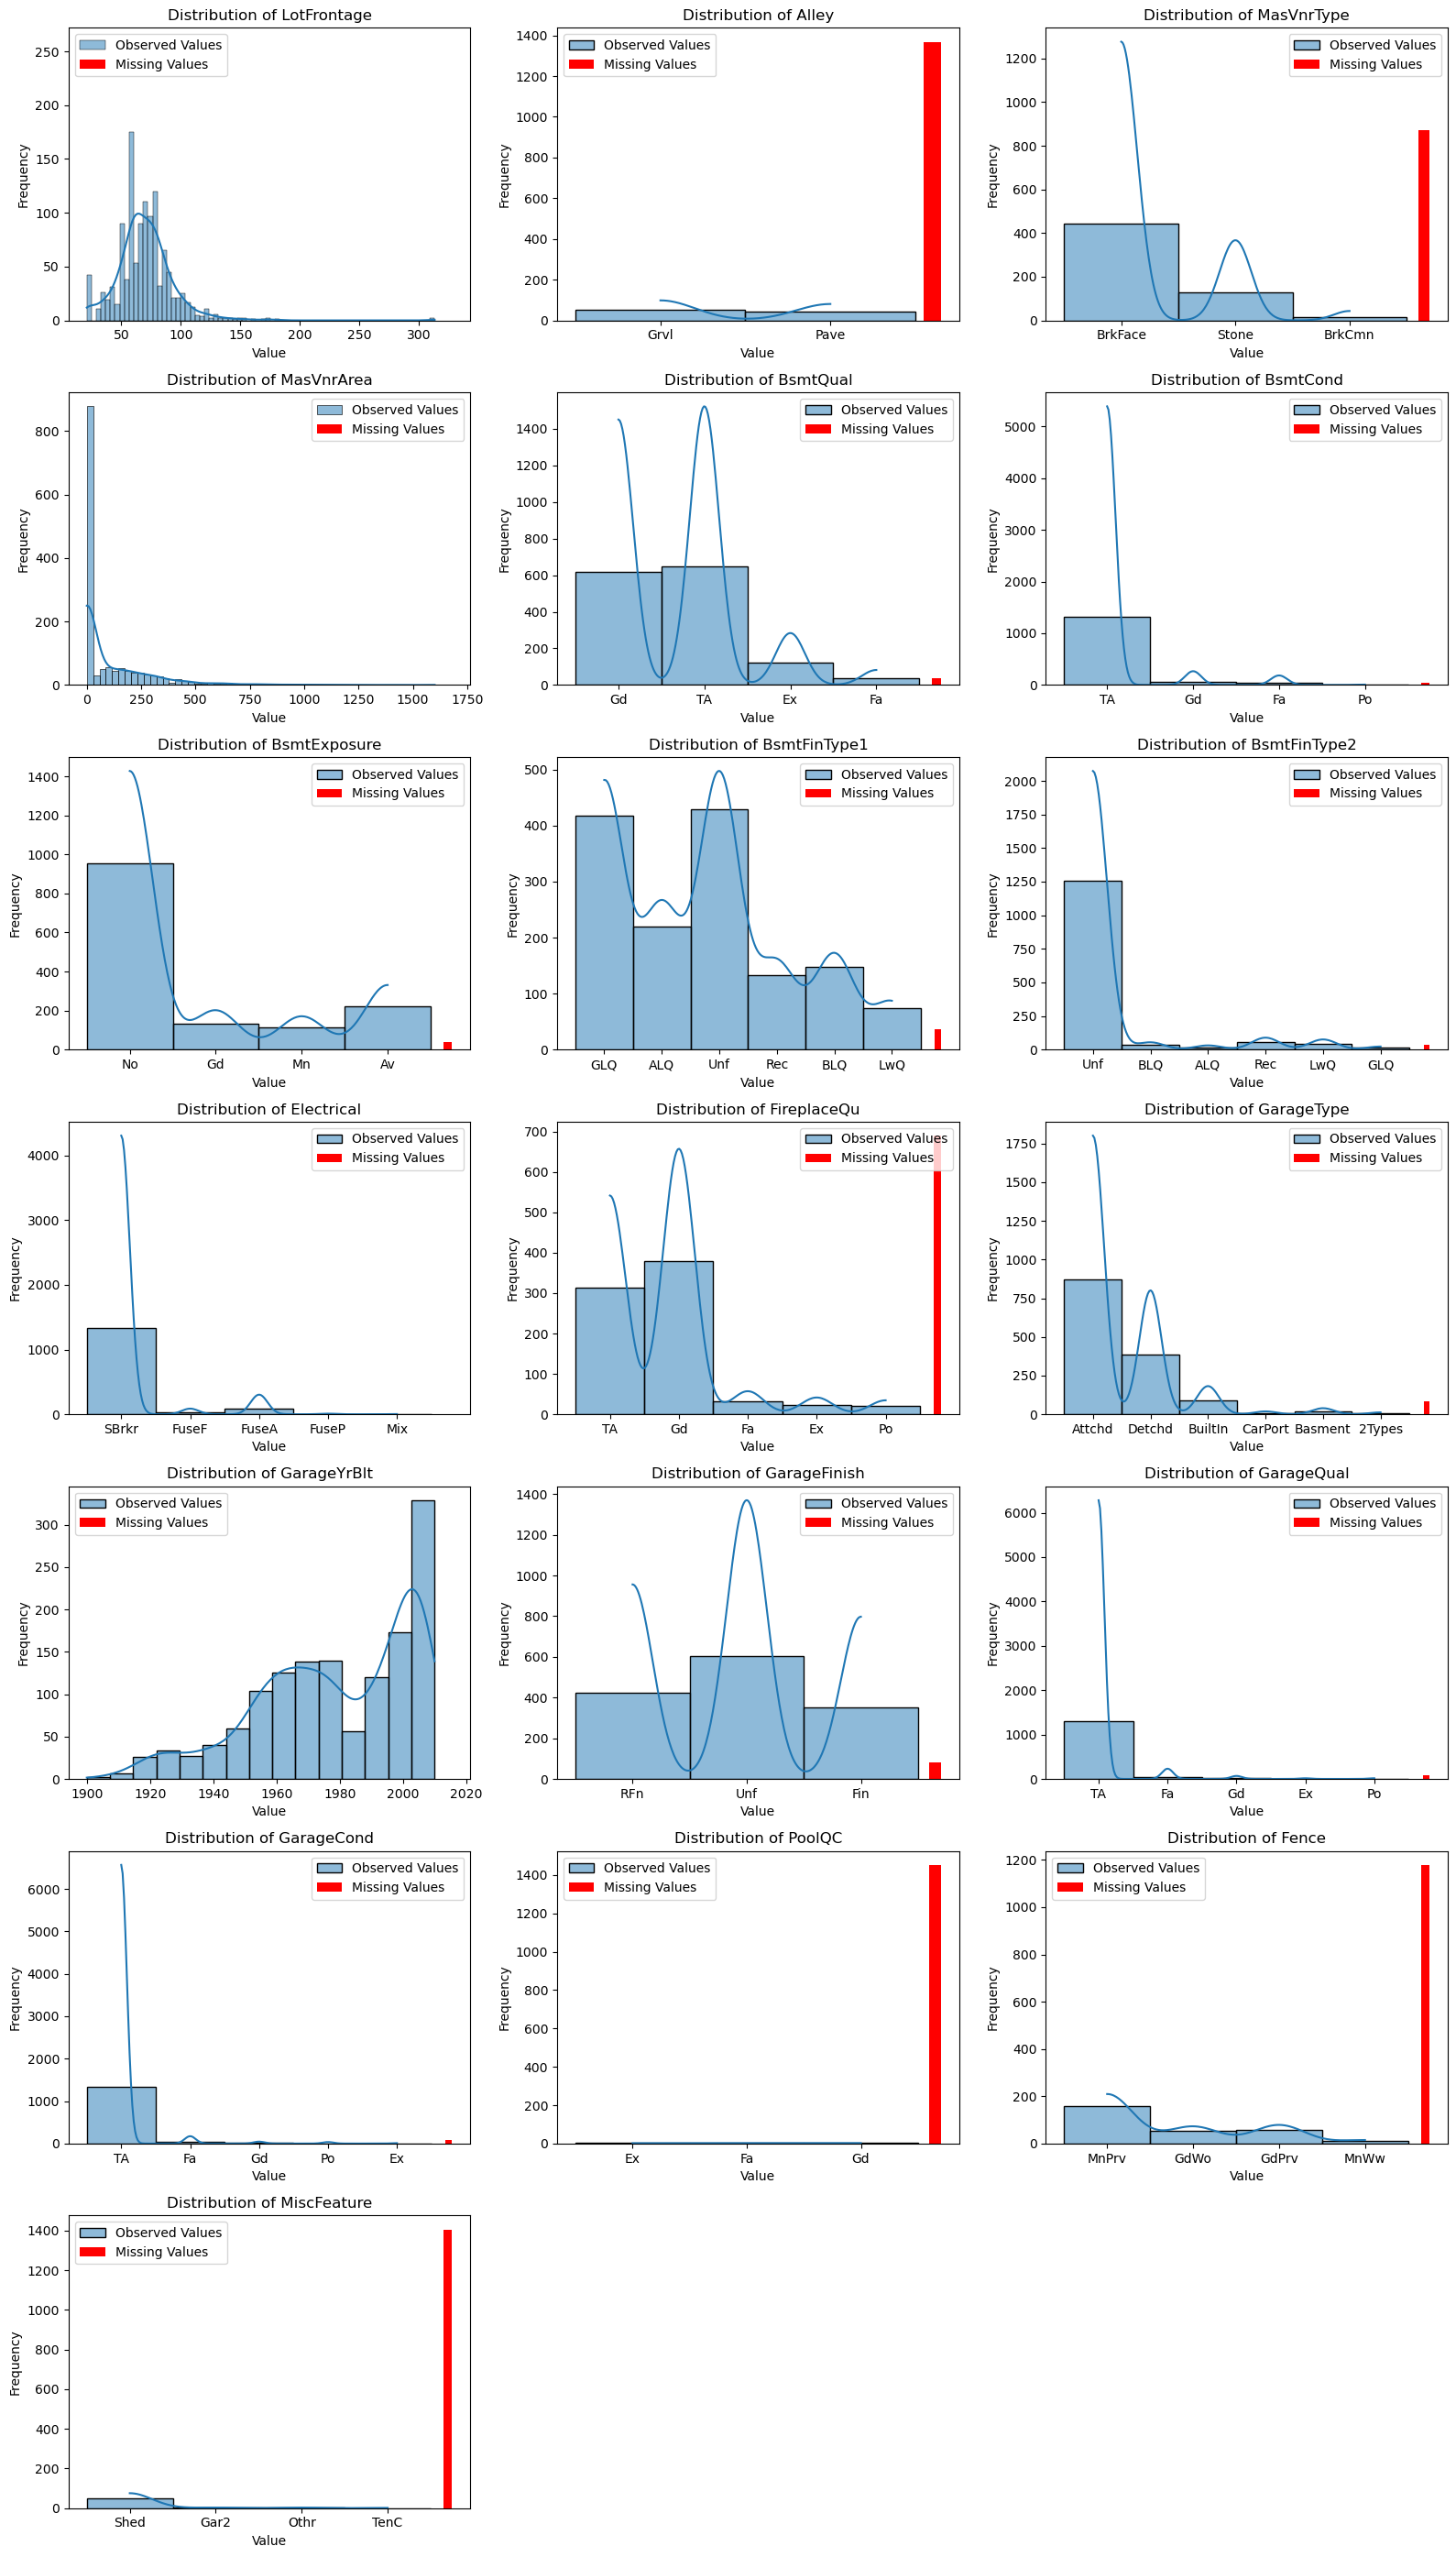

In [87]:
# Handle Missing Values

import pandas as pd
import math
import warnings

# Assuming your dataset is stored in a pandas DataFrame called 'X'

# Calculate the number of missing values in each feature
missing_values = X.isnull().sum()

# Calculate the total number of values in each feature
total_values = X.shape[0]

# Calculate the proportion of missing values in each feature
missing_proportions = missing_values / total_values

# Filter the features with missing values
features_with_missing = missing_proportions[missing_proportions > 0]

# Print the features with missing values and their proportions
print("Features with missing values:")
for feature, proportion in features_with_missing.items():
    print(f"{feature}: {proportion:.2%}")
    
# Create a heatmap to visualize the correlation between missing values across features
plt.figure(figsize=(10, 8))
sns.heatmap(X.isnull(), cmap='viridis', cbar_kws={'label': 'Missing Values'})
plt.title('Missing Value Heatmap')
plt.show()

# Distributions of features with missing data 

# Suppress the specific warning
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated and will be removed in a future version")

num_features = len(features_with_missing)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

for i, feature in enumerate(features_with_missing.index):
    row = i // num_cols
    col = i % num_cols
    
    observed_values = X[feature].dropna()
    missing_values_count = X[feature].isnull().sum()
    
    sns.histplot(observed_values, kde=True, label='Observed Values', ax=axes[row, col])
    
    # Add a bar for missing values
    axes[row, col].bar(axes[row, col].get_xlim()[1], missing_values_count, width=0.1, color='red', label='Missing Values')
    
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

# Remove empty subplots
for i in range(num_features, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

##### Masonry Veneer Features

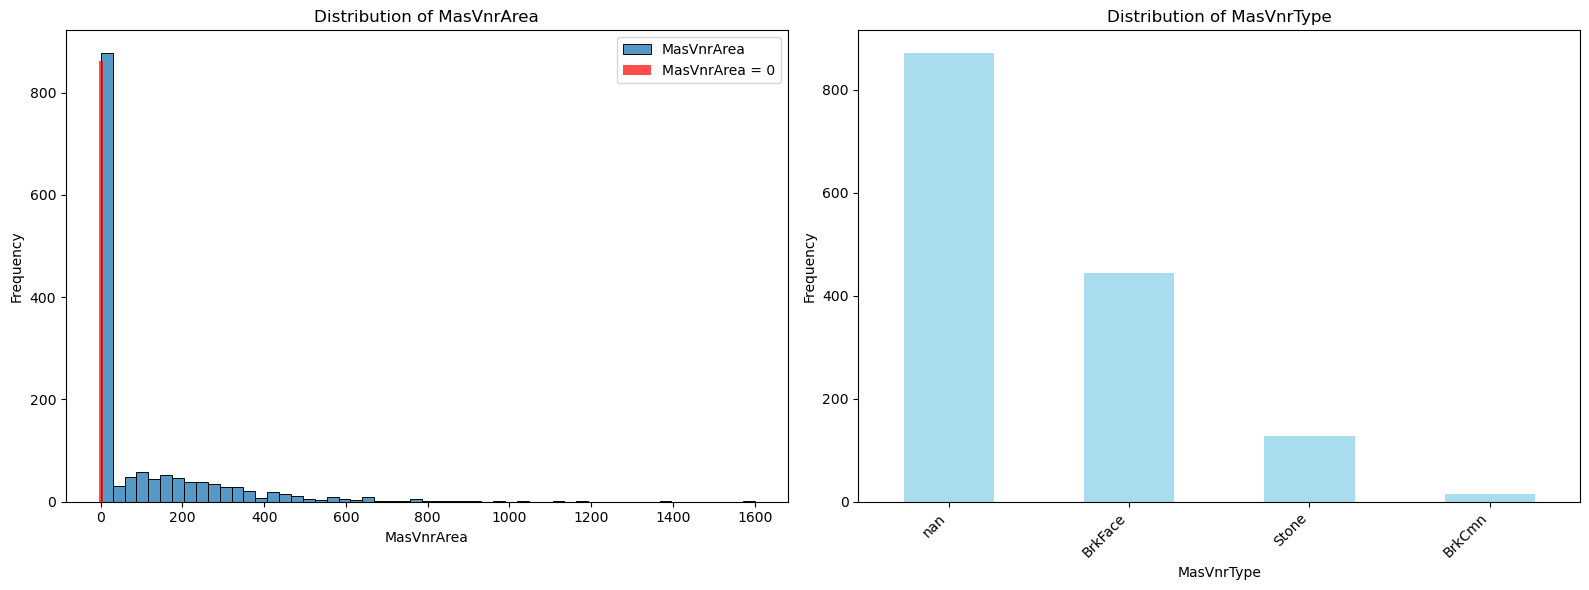

Number of instances with MasVnrArea being 0: 861
Number of instances with MasVnrArea being 0 and missing value in MasVnrType: 859


In [101]:
# Masonry veneer feature

import matplotlib.pyplot as plt

# Count the number of instances with MasVnrArea being 0
zero_masonry_count = (X['MasVnrArea'] == 0).sum()

# Count the number of instances with MasVnrArea being 0 and missing value in MasVnrType
zero_masonry_and_missing_type_count = ((X['MasVnrArea'] == 0) & (X['MasVnrType'].isnull())).sum()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the distribution of MasVnrArea
sns.histplot(X['MasVnrArea'], kde=False, label='MasVnrArea', ax=ax1)
ax1.set_title('Distribution of MasVnrArea')
ax1.set_xlabel('MasVnrArea')
ax1.set_ylabel('Frequency')

# Add a bar for instances with MasVnrArea being 0
ax1.bar(0, zero_masonry_count, width=10, color='red', alpha=0.7, label='MasVnrArea = 0')
ax1.legend()

# Plot the distribution of MasVnrType
masonry_type_counts = X['MasVnrType'].value_counts(dropna=False)
masonry_type_counts.plot(kind='bar', ax=ax2, color='skyblue', alpha=0.7)
ax2.set_title('Distribution of MasVnrType')
ax2.set_xlabel('MasVnrType')
ax2.set_ylabel('Frequency')

# Rotate x-tick labels for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

# Print the counts
print(f"Number of instances with MasVnrArea being 0: {zero_masonry_count}")
print(f"Number of instances with MasVnrArea being 0 and missing value in MasVnrType: {zero_masonry_and_missing_type_count}")

In [102]:
# Missing values in MasVnrType largely line up with MasVnrArea.

# Make MasVnrType missing values to be None. 
X['MasVnrType'] = X['MasVnrType'].fillna('None')
test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')

# One-hot encode 
X = pd.get_dummies(X, columns=['MasVnrType'], prefix='MasVnrType')
test_data = pd.get_dummies(test_data, columns=['MasVnrType'], prefix='MasVnrType')

In [131]:
# Missing values in MasVnrArea to be 0
X['MasVnrArea'] = X['MasVnrArea'].fillna(0)
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)

##### Alley

In [107]:
# Filling with new category
X['Alley'] = X['Alley'].fillna('Other')
test_data['Alley'] = test_data['Alley'].fillna('Other')

# One hot encode
X = pd.get_dummies(X, columns=['Alley'], prefix='Alley')
test_data = pd.get_dummies(test_data, columns=['Alley'], prefix='Alley')

##### Fireplace Features

In [113]:
# Count matching instances in train dataset
train_matching_instances = ((X['FireplaceQu'].isna()) & (X['Fireplaces'] == 0)).sum()

# Count matching instances in test dataset
test_matching_instances = ((test_data['FireplaceQu'].isna()) & (test_data['Fireplaces'] == 0)).sum()

# Print the results
print("Train Dataset:")
print("Number of instances where missing values in 'FireplaceQu' match 0s in 'Fireplaces':", train_matching_instances)
print()
print("Test Dataset:")
print("Number of instances where missing values in 'FireplaceQu' match 0s in 'Fireplaces':", test_matching_instances)

Train Dataset:
Number of instances where missing values in 'FireplaceQu' match 0s in 'Fireplaces': 690

Test Dataset:
Number of instances where missing values in 'FireplaceQu' match 0s in 'Fireplaces': 730


In [114]:
# Replace missing values in 'FireplaceQu' with 'None' for train dataset
X['FireplaceQu'] = X['FireplaceQu'].fillna('None')

# Replace missing values in 'FireplaceQu' with 'None' for test dataset
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('None')

# One-hot encode 'FireplaceQu' for train dataset
X = pd.get_dummies(X, columns=['FireplaceQu'], prefix='FireplaceQu')

# One-hot encode 'FireplaceQu' for test dataset
test_data = pd.get_dummies(test_data, columns=['FireplaceQu'], prefix='FireplaceQu')

##### Pool Features
PoolArea: Pool area in square feet
PoolQC: Pool quality

In [117]:
# Count matching instances in train dataset
train_matching_instances = ((X['PoolQC'].isna()) & (X['PoolArea'] == 0)).sum()

# Count non-matching instances in train dataset
train_non_matching_instances = ((X['PoolQC'].isna()) & (X['PoolArea'] != 0)).sum()

# Count matching instances in test dataset
test_matching_instances = ((test_data['PoolQC'].isna()) & (test_data['PoolArea'] == 0)).sum()

# Count non-matching instances in test dataset
test_non_matching_instances = ((test_data['PoolQC'].isna()) & (test_data['PoolArea'] != 0)).sum()

# Print the results
print("Train Dataset:")
print("Number of instances where missing values in 'PoolQC' match 0s in 'PoolArea':", train_matching_instances)
print("Number of instances where missing values in 'PoolQC' do not match 0s in 'PoolArea':", train_non_matching_instances)
print()
print("Test Dataset:")
print("Number of instances where missing values in 'PoolQC' match 0s in 'PoolArea':", test_matching_instances)
print("Number of instances where missing values in 'PoolQC' do not match 0s in 'PoolArea':", test_non_matching_instances)

Train Dataset:
Number of instances where missing values in 'PoolQC' match 0s in 'PoolArea': 1453
Number of instances where missing values in 'PoolQC' do not match 0s in 'PoolArea': 0

Test Dataset:
Number of instances where missing values in 'PoolQC' match 0s in 'PoolArea': 1453
Number of instances where missing values in 'PoolQC' do not match 0s in 'PoolArea': 3


In [118]:
# Replace missing values in 'PoolQC' with 'None' for train dataset
X['PoolQC'] = X['PoolQC'].fillna('None')

# Replace missing values in 'PoolQC' with 'None' for test dataset
test_data['PoolQC'] = test_data['PoolQC'].fillna('None')

# One-hot encode 'PoolQC' for train dataset
X = pd.get_dummies(X, columns=['PoolQC'], prefix='PoolQC')

# One-hot encode 'PoolQC' for test dataset
test_data = pd.get_dummies(test_data, columns=['PoolQC'], prefix='PoolQC')

##### Fence

In [119]:
# # Replace missing values in 'Fence' with 'None' for train dataset
X['Fence'] = X['Fence'].fillna('None')

# Replace missing values in 'Fence' with 'None' for test dataset
test_data['Fence'] = test_data['Fence'].fillna('None')

# One-hot encode 'Fence' for train dataset
X = pd.get_dummies(X, columns=['Fence'], prefix='Fence')

# One-hot encode 'Fence' for test dataset
test_data = pd.get_dummies(test_data, columns=['Fence'], prefix='Fence')

##### Misc Feature

In [120]:
# # Replace missing values in 'Fence' with 'None' for train dataset
X['MiscFeature'] = X['MiscFeature'].fillna('None')

# Replace missing values in 'Fence' with 'None' for test dataset
test_data['MiscFeature'] = test_data['MiscFeature'].fillna('None')

# One-hot encode 'Fence' for train dataset
X = pd.get_dummies(X, columns=['MiscFeature'], prefix='MiscFeature')

# One-hot encode 'Fence' for test dataset
test_data = pd.get_dummies(test_data, columns=['MiscFeature'], prefix='MiscFeature')

##### Garage Features

In [121]:
# Replace missing values with 'None' for categorical garage features in train dataset
X[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = X[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('None')

# Replace missing values with 'None' for categorical garage features in test dataset
test_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = test_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('None')

# One-hot encode categorical garage features for train dataset
X = pd.get_dummies(X, columns=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'], prefix=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'])

# One-hot encode categorical garage features for test dataset
test_data = pd.get_dummies(test_data, columns=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'], prefix=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'])

In [123]:
# Replace missing values in GarageYrBlt with 0 (proxy for None)
X['GarageYrBlt'] = X['GarageYrBlt'].fillna(0)
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(0)

##### Basement Features

In [124]:
# Replace missing values with 'None' for categorical basement features in train dataset
X[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = X[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('None')

# Replace missing values with 'None' for categorical basement features in test dataset
test_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = test_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('None')

# One-hot encode categorical basement features for train dataset
X = pd.get_dummies(X, columns=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], prefix=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'])

# One-hot encode categorical basement features for test dataset
test_data = pd.get_dummies(test_data, columns=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], prefix=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'])

#### Checking remaining missing values

In [133]:
import pandas as pd

def describe_missing_data(data, dataset_name):
    # Get the number of missing values and data types for each feature
    missing_values = data.isnull().sum()
    data_types = data.dtypes

    # Create a DataFrame to store the feature information
    feature_info = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})

    # Calculate the percentage of missing values for each feature
    feature_info['Missing %'] = feature_info['Missing Values'] / len(data) * 100

    # Filter the features with missing values
    missing_features = feature_info[feature_info['Missing Values'] > 0]

    # Sort the missing features by the number of missing values in descending order
    missing_features = missing_features.sort_values('Missing Values', ascending=False)

    # Print the information about missing features
    if len(missing_features) > 0:
        print(f"Features with missing values in {dataset_name} dataset:")
        print(missing_features)
    else:
        print(f"No features with missing values in {dataset_name} dataset.")

print("Training Dataset:")
describe_missing_data(X, "Training")

print("\nTest Dataset:")
describe_missing_data(test_data, "Test")

Training Dataset:
Features with missing values in Training dataset:
             Missing Values Data Type  Missing %
LotFrontage             259   float64  17.739726
Electrical                1    object   0.068493

Test Dataset:
Features with missing values in Test dataset:
              Missing Values Data Type  Missing %
LotFrontage              227   float64  15.558602
MSZoning                   4    object   0.274160
Utilities                  2    object   0.137080
BsmtFullBath               2   float64   0.137080
BsmtHalfBath               2   float64   0.137080
Functional                 2    object   0.137080
Exterior1st                1    object   0.068540
Exterior2nd                1    object   0.068540
BsmtFinSF1                 1   float64   0.068540
BsmtFinSF2                 1   float64   0.068540
BsmtUnfSF                  1   float64   0.068540
TotalBsmtSF                1   float64   0.068540
KitchenQual                1    object   0.068540
GarageCars              

#### Fill in with infered values.
Remaining features are either numeric with small number of missing values < 20%. Infer from rest of data.

## Predictions

In [58]:
# Fit the pipeline on the entire training data
# pipeline.fit(X, y)

# Make predictions on the test set
test_predictions = best_model.predict(test_data)

# Create a DataFrame with the test IDs and predicted SalePrice
submission_df = pd.DataFrame({'Id': test_id, 'SalePrice': test_predictions})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)